In [1]:
import pandas as pd
import random
import datetime

def generate_onboarding_data(start_date, end_date, seed=42):
    """Generates synthetic employee onboarding data for a given date range with a fixed random seed.

    Args:
        start_date (datetime.date): The start date for data generation.
        end_date (datetime.date): The end date for data generation.
        seed (int): The random seed for reproducibility.

    Returns:
        pandas.DataFrame: A DataFrame containing the synthetic data.
    """
    
    # Set random seed for reproducibility
    random.seed(seed)

    data = []
    tasks = ["Application Review", "Background Check", "Interview Scheduling", "Offer Letter Creation", "Onboarding Documents"]

    # Generate data for each day
    current_date = start_date
    while current_date <= end_date:
        for task in tasks:
            # Simulate processing time (in minutes) with some variation
            processing_time = random.randint(10, 40)

            # Simulate error rate (percentage)
            error_rate = random.uniform(0.01, 0.08)

            # Simulate completion rate (percentage)
            completion_rate = random.uniform(0.92, 0.99)

            # Simulate manual intervention rate (percentage)
            manual_intervention = random.uniform(0.05, 0.25)

            # Append data point
            data.append([current_date, task, processing_time, error_rate, completion_rate, manual_intervention])

        current_date += datetime.timedelta(days=1)

    # Create DataFrame
    df = pd.DataFrame(data, columns=["Date", "Task", "Processing Time (mins)", "Error Rate", "Completion Rate", "Manual Intervention"])
    return df

# Define date range
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 12, 31)

# Generate data
onboarding_data = generate_onboarding_data(start_date, end_date)

# Save to CSV
onboarding_data.to_csv("onboarding_data.csv", index=False)

print("Synthetic onboarding data generated and saved to onboarding_data.csv")


Synthetic onboarding data generated and saved to onboarding_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\PREDATOR\Desktop\case_study1\onboarding_data.csv")

In [3]:
df.head()

,Date,Task,Processing Time (mins),Error Rate,Completion Rate,Manual Intervention
0,2023-01-01,Application Review,30,0.017793,0.971909,0.098978
1,2023-01-01,Background Check,14,0.061553,0.967369,0.228436
2,2023-01-01,Interview Scheduling,12,0.051334,0.922225,0.068739
3,2023-01-01,Offer Letter Creation,17,0.045375,0.921858,0.089768
4,2023-01-01,Onboarding Documents,30,0.059093,0.949366,0.139842


In [4]:
df.tail()

,Date,Task,Processing Time (mins),Error Rate,Completion Rate,Manual Intervention
1820,2023-12-31,Application Review,17,0.077432,0.981560,0.237394
1821,2023-12-31,Background Check,21,0.043266,0.945742,0.111634
1822,2023-12-31,Interview Scheduling,30,0.077676,0.962407,0.218295
1823,2023-12-31,Offer Letter Creation,31,0.065926,0.923827,0.233491
1824,2023-12-31,Onboarding Documents,31,0.026777,0.958691,0.111854


In [5]:
df.shape

(1825, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1825 non-null   object 
 1   Task                    1825 non-null   object 
 2   Processing Time (mins)  1825 non-null   int64  
 3   Error Rate              1825 non-null   float64
 4   Completion Rate         1825 non-null   float64
 5   Manual Intervention     1825 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 85.7+ KB


In [7]:
# Convert Date to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Summary statistics
df.describe()

,Date,Processing Time (mins),Error Rate,Completion Rate,Manual Intervention
count,1825,1825.000000,1825.000000,1825.000000,1825.000000
mean,2023-07-02 00:00:00.000000256,25.010959,0.045451,0.954987,0.149965
min,2023-01-01 00:00:00,10.000000,0.010084,0.920006,0.050169
25%,2023-04-02 00:00:00,18.000000,0.028966,0.937800,0.101564
50%,2023-07-02 00:00:00,25.000000,0.046130,0.954630,0.149290
75%,2023-10-01 00:00:00,32.000000,0.062193,0.972189,0.198934
max,2023-12-31 00:00:00,40.000000,0.079956,0.989972,0.249982
std,NaN,8.795427,0.019966,0.020114,0.056815


Basic Statistics for Key Metrics:
       Processing Time (mins)   Error Rate  Completion Rate  \
count             1825.000000  1825.000000      1825.000000   
mean                25.010959     0.045451         0.954987   
std                  8.795427     0.019966         0.020114   
min                 10.000000     0.010084         0.920006   
25%                 18.000000     0.028966         0.937800   
50%                 25.000000     0.046130         0.954630   
75%                 32.000000     0.062193         0.972189   
max                 40.000000     0.079956         0.989972   

       Manual Intervention  
count          1825.000000  
mean              0.149965  
std               0.056815  
min               0.050169  
25%               0.101564  
50%               0.149290  
75%               0.198934  
max               0.249982  


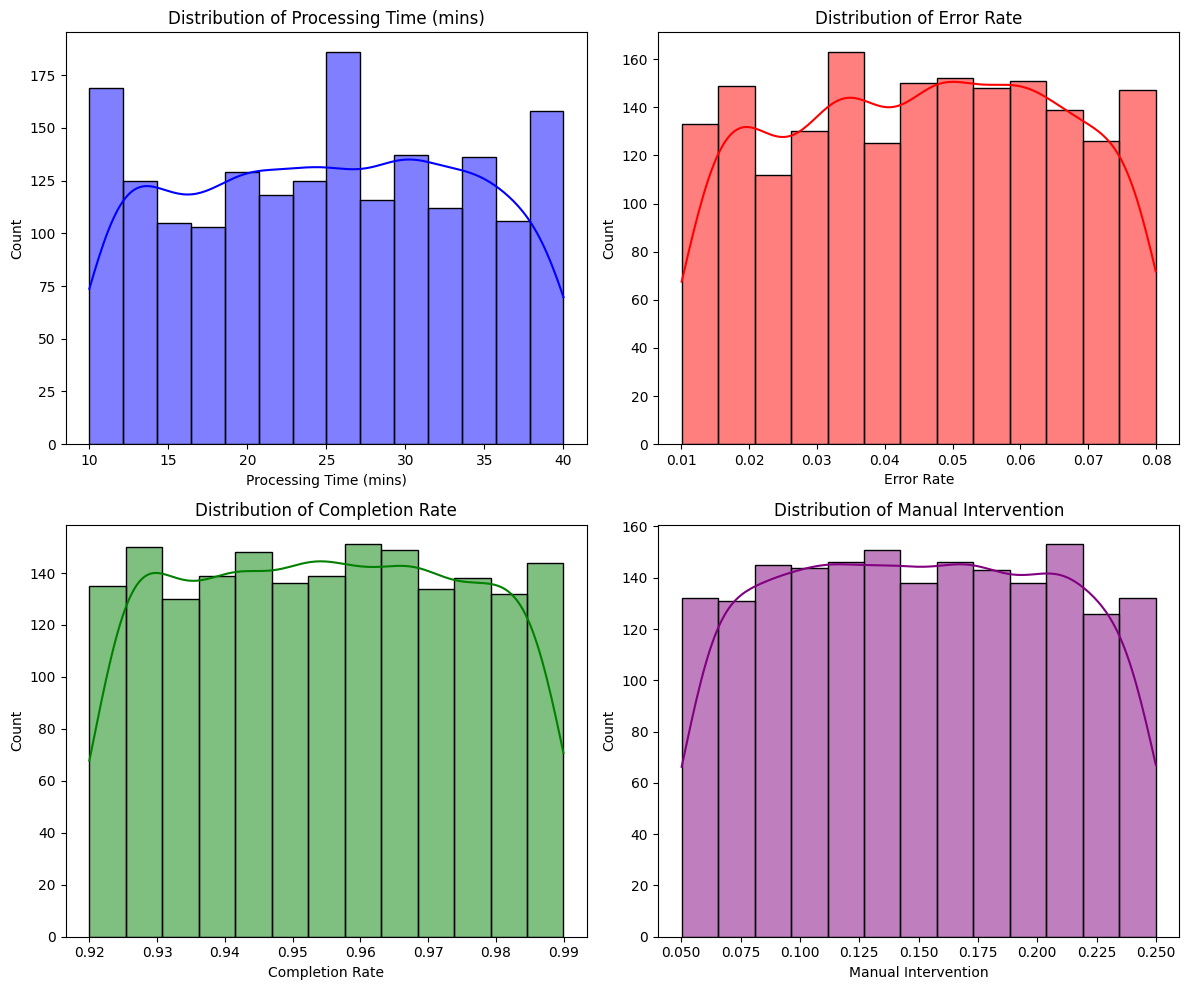

In [9]:
# Display basic statistics for key metrics
print("Basic Statistics for Key Metrics:")
print(df[['Processing Time (mins)', 'Error Rate', 'Completion Rate', 'Manual Intervention']].describe())

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the distribution of Processing Time
plt.subplot(2, 2, 1)
sns.histplot(df['Processing Time (mins)'], kde=True, color='blue')
plt.title('Distribution of Processing Time (mins)')

# Plot the distribution of Error Rate
plt.subplot(2, 2, 2)
sns.histplot(df['Error Rate'], kde=True, color='red')
plt.title('Distribution of Error Rate')

# Plot the distribution of Completion Rate
plt.subplot(2, 2, 3)
sns.histplot(df['Completion Rate'], kde=True, color='green')
plt.title('Distribution of Completion Rate')

# Plot the distribution of Manual Intervention
plt.subplot(2, 2, 4)
sns.histplot(df['Manual Intervention'], kde=True, color='purple')
plt.title('Distribution of Manual Intervention')

# Adjust the spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Extract the year and month from the 'Date' column
df['Year-Month'] = df['Date'].dt.to_period('M')

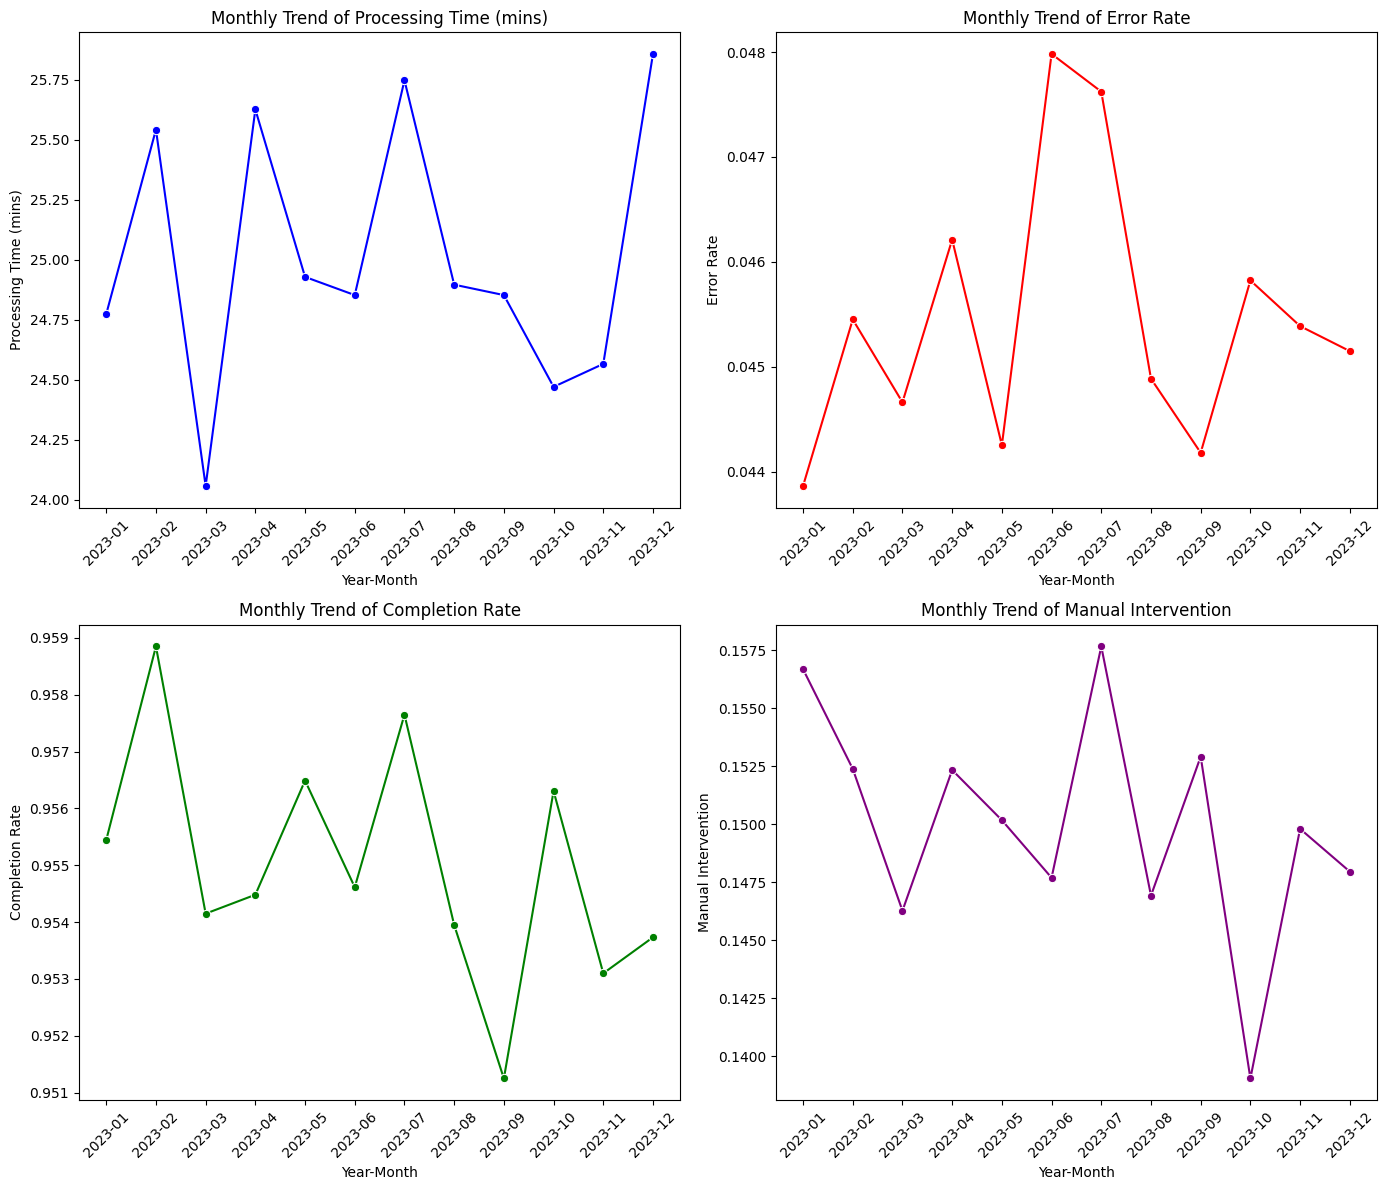

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year-Month' to string format for easier plotting
df['Year-Month'] = df['Year-Month'].astype(str)

# Group by the 'Year-Month' and calculate the mean for each numeric metric
monthly_data = df.groupby('Year-Month')[['Processing Time (mins)', 'Error Rate', 'Completion Rate', 'Manual Intervention']].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Plot the monthly trend for Processing Time
plt.subplot(2, 2, 1)
sns.lineplot(data=monthly_data, x='Year-Month', y='Processing Time (mins)', marker='o', color='blue')
plt.title('Monthly Trend of Processing Time (mins)')
plt.xticks(rotation=45)

# Plot the monthly trend for Error Rate
plt.subplot(2, 2, 2)
sns.lineplot(data=monthly_data, x='Year-Month', y='Error Rate', marker='o', color='red')
plt.title('Monthly Trend of Error Rate')
plt.xticks(rotation=45)

# Plot the monthly trend for Completion Rate
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_data, x='Year-Month', y='Completion Rate', marker='o', color='green')
plt.title('Monthly Trend of Completion Rate')
plt.xticks(rotation=45)

# Plot the monthly trend for Manual Intervention
plt.subplot(2, 2, 4)
sns.lineplot(data=monthly_data, x='Year-Month', y='Manual Intervention', marker='o', color='purple')
plt.title('Monthly Trend of Manual Intervention')
plt.xticks(rotation=45)

# Adjust the spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


Tasks with Highest Average Processing Time:
 Task
Onboarding Documents     25.558904
Application Review       25.550685
Offer Letter Creation    24.945205
Background Check         24.536986
Interview Scheduling     24.463014
Name: Processing Time (mins), dtype: float64
Tasks with Highest Average Error Rate:
 Task
Onboarding Documents     0.047155
Background Check         0.046133
Application Review       0.045880
Interview Scheduling     0.044207
Offer Letter Creation    0.043880
Name: Error Rate, dtype: float64
Tasks with Highest Average Manual Intervention:
 Task
Background Check         0.151034
Offer Letter Creation    0.150633
Onboarding Documents     0.150332
Application Review       0.149613
Interview Scheduling     0.148213
Name: Manual Intervention, dtype: float64


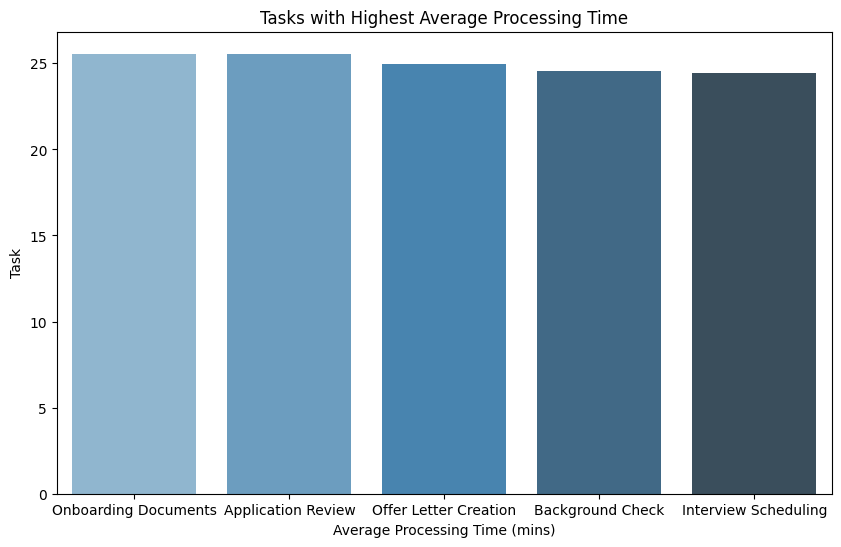

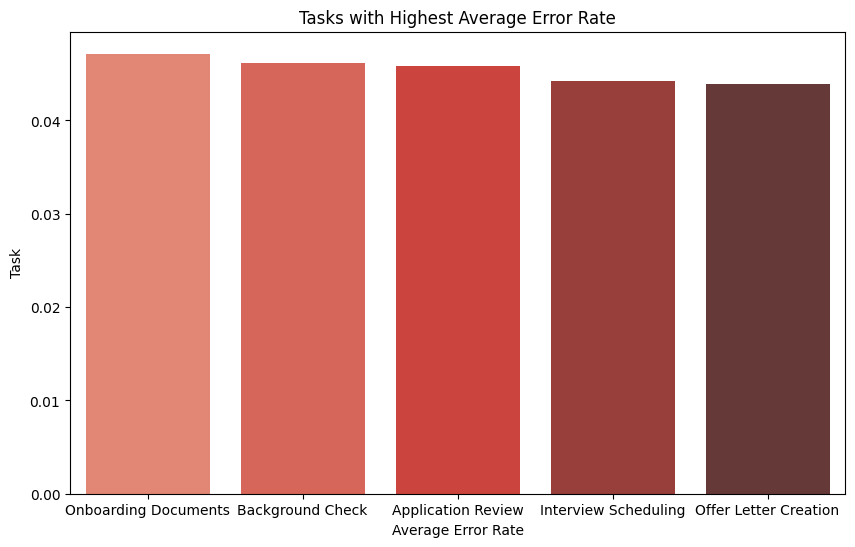

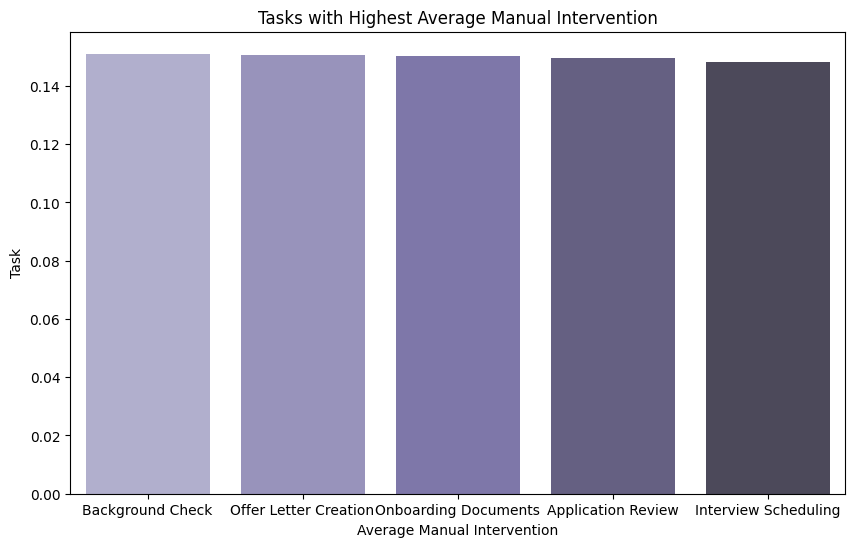

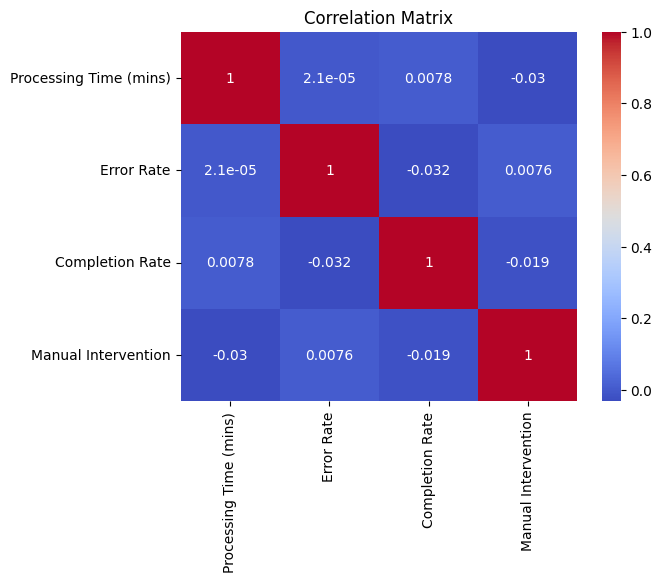

In [12]:
# 2.1 Detecting High Processing Time Tasks
high_processing_time = df.groupby('Task')['Processing Time (mins)'].mean().sort_values(ascending=False)
print("Tasks with Highest Average Processing Time:\n", high_processing_time)

# 2.2 Evaluating High Error Rate Tasks
high_error_rate = df.groupby('Task')['Error Rate'].mean().sort_values(ascending=False)
print("Tasks with Highest Average Error Rate:\n", high_error_rate)

# 2.3 Analyzing Manual Interventions
high_manual_intervention = df.groupby('Task')['Manual Intervention'].mean().sort_values(ascending=False)
print("Tasks with Highest Average Manual Intervention:\n", high_manual_intervention)

# Plot High Processing Time Tasks
plt.figure(figsize=(10, 6))
sns.barplot(y=high_processing_time.values, x=high_processing_time.index, hue=high_processing_time.index, palette="Blues_d", dodge=False, legend=False)
plt.title('Tasks with Highest Average Processing Time')
plt.xlabel('Average Processing Time (mins)')
plt.ylabel('Task')
plt.show()

# Plot High Error Rate Tasks
plt.figure(figsize=(10, 6))
sns.barplot(y=high_error_rate.values, x=high_error_rate.index, hue=high_error_rate.index, palette="Reds_d", dodge=False, legend=False)
plt.title('Tasks with Highest Average Error Rate')
plt.xlabel('Average Error Rate')
plt.ylabel('Task')
plt.show()

# Plot High Manual Intervention Tasks
plt.figure(figsize=(10, 6))
sns.barplot(y=high_manual_intervention.values, x=high_manual_intervention.index, hue=high_manual_intervention.index, palette="Purples_d", dodge=False, legend=False)
plt.title('Tasks with Highest Average Manual Intervention')
plt.xlabel('Average Manual Intervention')
plt.ylabel('Task')
plt.show()



# 2.4 Correlation Analysis
correlation_matrix = df[['Processing Time (mins)', 'Error Rate', 'Completion Rate', 'Manual Intervention']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()